# Fast haze removal implementation

In this notebook, we will implement the method described in the article "Fast Haze Removal for a Single Remote Sensing Image Using Dark Channel Prior".

## Import of libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import holidays
from datetime import datetime, timedelta, date
import matplotlib.pyplot as plt

### Import of images

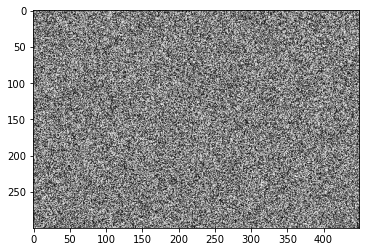

In [11]:
n = 300
m = 450
img = np.random.randint(0, 255, size=(n, m, 3))
plt.imshow(img[:,:,1], cmap='gray')

### Algotihtm implementation

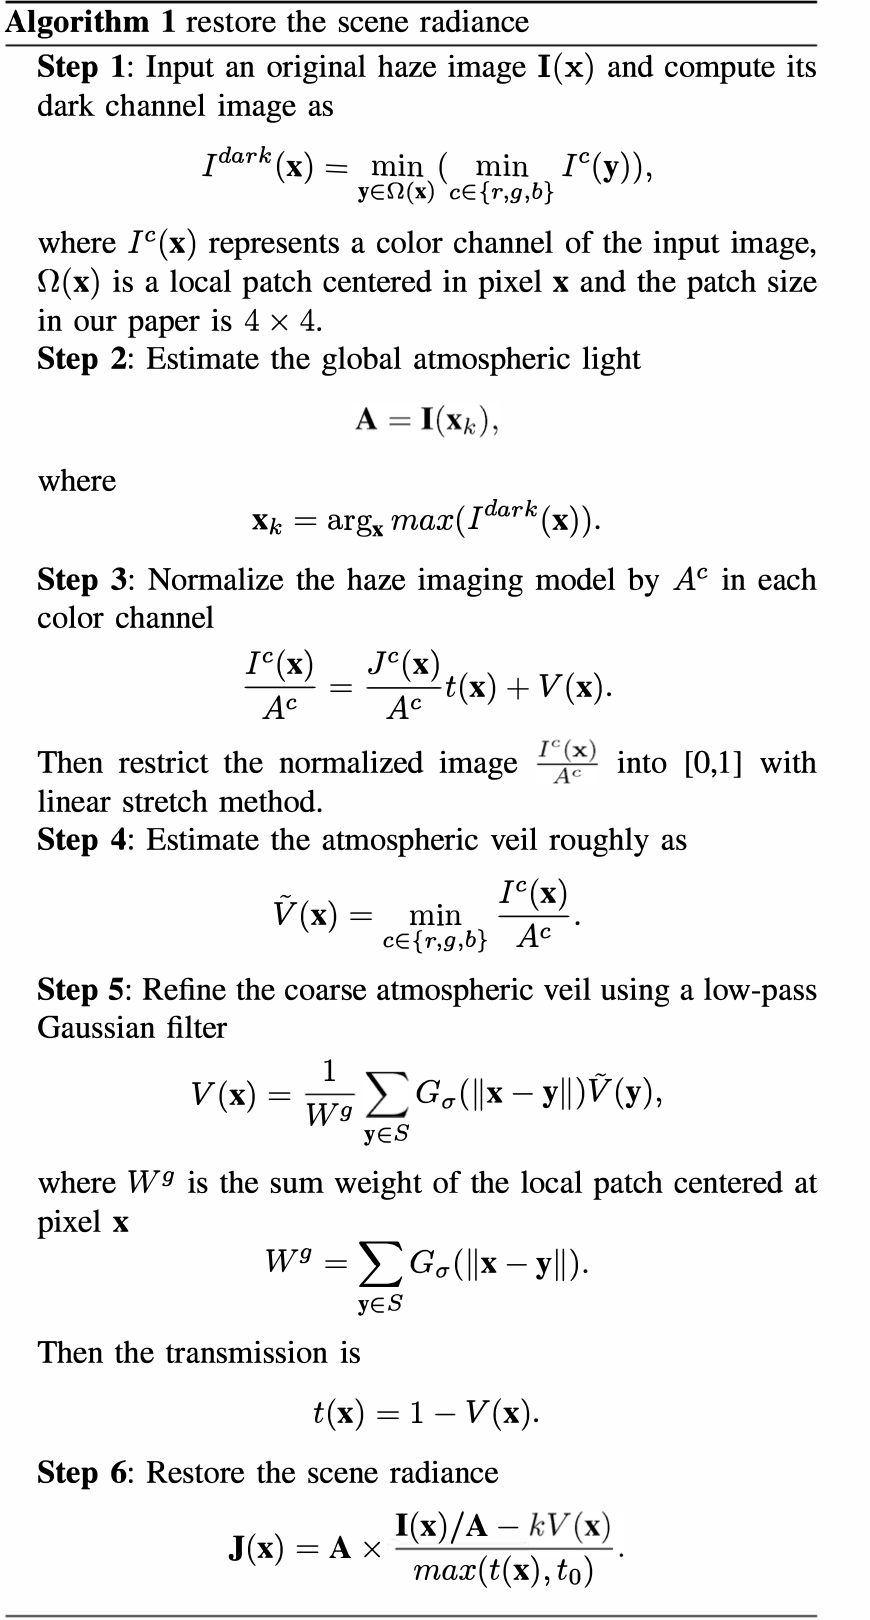

In [33]:
def dark_channel_prior(img, patch_size):
    """ Compute the dark channel of an image
    
    Inputs:
        img:           The input image
        patch_size:    The size of the neighborhood considered
                         
    Outputs: 
        img_dark       The dark image
    """
    
    h, w ,c = img.shape

    pad_img = np.array([np.pad(img[:,:,c], pad_width=patch_size) for c in range(img.shape[-1])])
    ## pad_img.shape = (3,h+2*pad_width, w+2*pad_width)

    img_dark = np.zeros((h, w))
    
    for k in range(patch_size, h+patch_size):
        
        for j in range(patch_size, w+patch_size):
            
            img_dark[k-patch_size,j-patch_size] = np.min(pad_img[: ,k-patch_size:k+patch_size+1, j-patch_size:j+patch_size+1])
    
    return img_dark          

In [40]:
patch_size = 4
dark_channel_img = dark_channel_prior(img, patch_size)

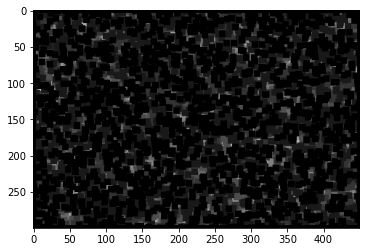

In [41]:
plt.imshow(dark_channel_img, cmap='gray')